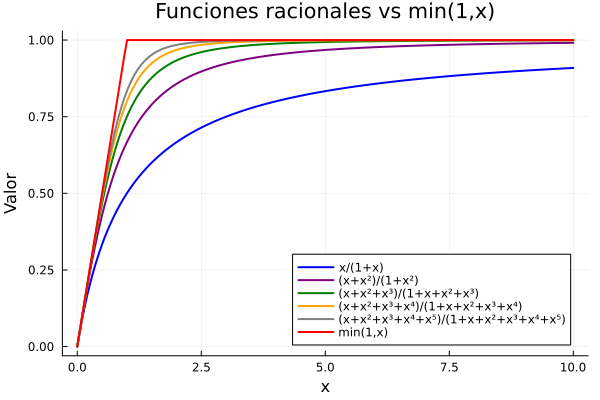

In [10]:
using Plots

x = range(0, 10, length=200)
g = min.(1, x)
f = x ./(1 .+ x)
ff =  (x .+ x.^2) ./(1 .+ x .+ x.^2)
fff =  (x .+ x.^2 + x.^3) ./(1 .+ x .+ x.^2 + x.^3)
ffff = (x .+ x.^2 + x.^3 + x.^4) ./(1 .+ x .+ x.^2 + x.^3 + x.^4)
fffff = (x .+ x.^2 + x.^3 + x.^4 + x.^5) ./(1 .+ x .+ x.^2 + x.^3 + x.^4 + x.^5)

plot(x, f, label="x/(1+x)", lw=2, color=:blue)
plot!(x, ff, label="(x+x²)/(1+x²)", lw=2, color=:purple)
plot!(x, fff, label="(x+x²+x³)/(1+x+x²+x³)", lw=2, color=:green)
plot!(x, ffff, label="(x+x²+x³+x⁴)/(1+x+x²+x³+x⁴)", lw=2, color=:orange)
plot!(x, fffff, label= "(x+x²+x³+x⁴+x⁵)/(1+x+x²+x³+x⁴+x⁵)", lw=2, color=:gray)
plot!(x, g, label="min(1,x)", lw=2, color=:red)
xlabel!("x")
ylabel!("Valor")
title!("Funciones racionales vs min(1,x)")

In [11]:
using Printf
using Random

"""
Método de Newton para calcular 1/(1+x) usando solo sumas y productos.
La función a invertir es f(y) = 1/y - (1+x) = 0
Newton: y_{n+1} = y_n - f(y_n)/f'(y_n) = y_n(2 - y_n(1+x))
"""
function newton_reciprocal(x, y0; tol=1e-10, max_iter=1000)
    y = y0
    target = 1 / (1 + x)
    iterations = 0
    
    for i in 1:max_iter
        y_new = y * (2 - y * (1 + x))  # Solo suma y productos
        iterations = i
        
        # Verificar convergencia
        if abs(y_new - target) < tol * abs(target)
            return y_new, iterations, true
        end
        
        y = y_new
    end
    
    return y, iterations, false
end

"""
Prueba el método de Newton para diferentes valores de x
"""
function test_convergence()
    println("Método de Newton para calcular 1/(1+x)")
    println("=" ^ 80)
    println()
    
    # Valores de x a probar (escala logarítmica)
    x_values = [10.0^i for i in -10:10]
    x_values = [ rand() * 10.0^i for i in -20:20 for _ in 1:5 ]  # 5 valores por década
    x_values = sort(x_values)
    
    # Probar diferentes condiciones iniciales
    println("CONDICIÓN INICIAL FIJA: y0 = 1.0")
    println("-" ^ 80)
    @printf("%-15s %-20s %-12s %-15s %s\n", "x", "1/(1+x)", "Iteraciones", "Convergió", "Error relativo")
    println("-" ^ 80)
    
    for x in x_values
        y0 = 1e-20  # Condición inicial fija
        result, iters, converged = newton_reciprocal(x, y0)
        target = 1 / (1 + x)
        rel_error = abs(result - target) / abs(target)
        
        @printf("%-15.2e %-20.15e %-12d %-15s %.2e\n", 
                x, target, iters, converged ? "Sí" : "No", rel_error)
    end
    
    println()
    println("=" ^ 80)
    println("CONDICIÓN INICIAL DEPENDIENTE: y0 = 1/(2+x)")
    println("-" ^ 80)
    @printf("%-15s %-20s %-12s %-15s %s\n", "x", "1/(1+x)", "Iteraciones", "Convergió", "Error relativo")
    println("-" ^ 80)
    
    for x in x_values
        y0 = x / 1e20  # Condición inicial que depende linealmente de x
        result, iters, converged = newton_reciprocal(x, y0)
        target = 1 / (1 + x)
        rel_error = abs(result - target) / abs(target)
        
        @printf("%-15.2e %-20.15e %-12d %-15s %.2e\n", 
                x, target, iters, converged ? "Sí" : "No", rel_error)
    end
    
    println()
    println("=" ^ 80)
    println("CONDICIÓN INICIAL ÓPTIMA: y0 = 1/x (para x grandes)")
    println("-" ^ 80)
    @printf("%-15s %-20s %-12s %-15s %s\n", "x", "1/(1+x)", "Iteraciones", "Convergió", "Error relativo")
    println("-" ^ 80)
    
    for x in x_values
        y0 = x > 1 ? 1/x : 1.0  # Usar 1/x para x grandes, 1.0 para x pequeños
        result, iters, converged = newton_reciprocal(x, y0)
        target = 1 / (1 + x)
        rel_error = abs(result - target) / abs(target)
        
        @printf("%-15.2e %-20.15e %-12d %-15s %.2e\n", 
                x, target, iters, converged ? "Sí" : "No", rel_error)
    end
end

# Ejecutar las pruebas
test_convergence()

Método de Newton para calcular 1/(1+x)

CONDICIÓN INICIAL FIJA: y0 = 1.0
--------------------------------------------------------------------------------
x               1/(1+x)              Iteraciones  Convergió       Error relativo
--------------------------------------------------------------------------------
1.05e-22        1.000000000000000e+00 71           Sí              5.57e-11
2.01e-21        1.000000000000000e+00 71           Sí              5.57e-11
3.21e-21        1.000000000000000e+00 71           Sí              5.57e-11
3.90e-21        1.000000000000000e+00 71           Sí              5.57e-11
8.95e-21        1.000000000000000e+00 71           Sí              5.57e-11
1.38e-20        1.000000000000000e+00 71           Sí              5.57e-11
6.69e-20        1.000000000000000e+00 71           Sí              5.57e-11
8.10e-20        1.000000000000000e+00 71           Sí              5.57e-11
8.88e-20        1.000000000000000e+00 71           Sí              5.57e-11


Convergencia del método de Newton con y0 = 1e-10
x               1/(1+x)              Iteraciones  Convergió      
----------------------------------------------------------------------
1.00e-10        9.999999999000000e-01 39           Sí             
1.00e-05        9.999900000999989e-01 39           Sí             
1.00e+00        5.000000000000000e-01 38           Sí             
1.00e+05        9.999900000999991e-06 22           Sí             
1.00e+10        9.999999999000000e-11 1            Sí             


┌ Warning: No strict ticks found
└ @ PlotUtils /home/julian/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/julian/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/julian/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/julian/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/julian/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/julian/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/julian/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


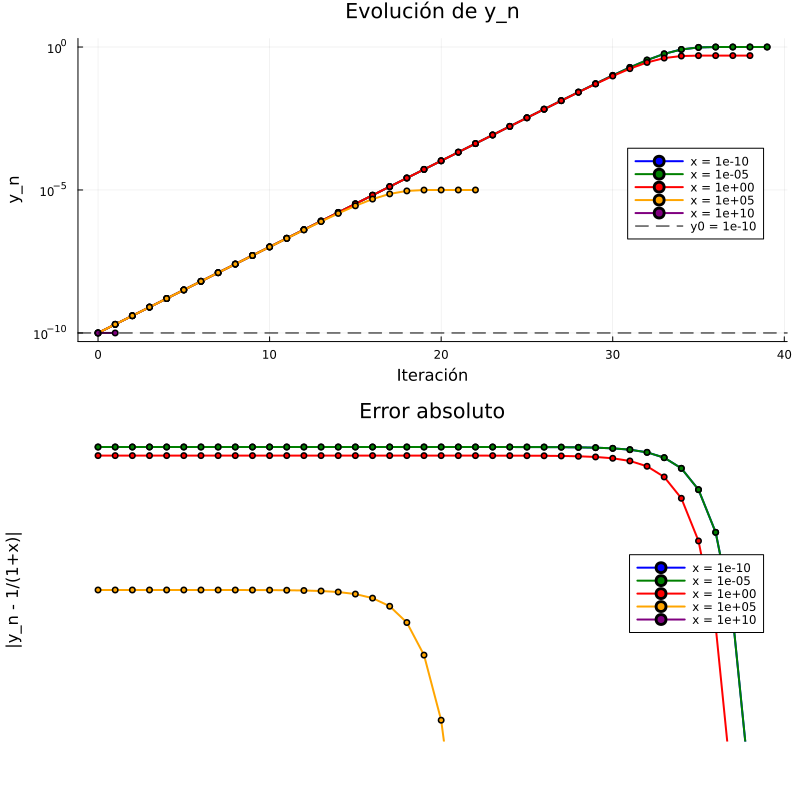

In [ ]:
using Printf
using Plots

"""
Método de Newton para calcular 1/(1+x) usando solo sumas y productos.
La función a invertir es f(y) = 1/y - (1+x) = 0
Newton: y_{n+1} = y_n - f(y_n)/f'(y_n) = y_n(2 - y_n(1+x))
"""
function newton_reciprocal_trace(x, y0; tol=1e-15, max_iter=1000)
    y = y0
    target = 1 / (1 + x)
    
    y_history = [y]
    error_history = [abs(y - target)]
    
    for i in 1:max_iter
        y_new = y * (2 - y * (1 + x))  # Solo suma y productos
        
        push!(y_history, y_new)
        push!(error_history, abs(y_new - target))
        
        # Verificar convergencia
        if abs(y_new - target) < tol * abs(target)
            return y_history, error_history, i, true
        end
        
        y = y_new
    end
    
    return y_history, error_history, max_iter, false
end

"""
Grafica la convergencia para diferentes valores de x con y0 = 1e-10
"""
function plot_convergence_y0_fixed()
    y0 = 1e-10
    
    # Valores de x a probar
    x_values = [1e-10, 1e-5, 1.0, 1e5, 1e10]
    colors = [:blue, :green, :red, :orange, :purple]
    
    println("Convergencia del método de Newton con y0 = 1e-10")
    println("=" ^ 70)
    @printf("%-15s %-20s %-12s %-15s\n", "x", "1/(1+x)", "Iteraciones", "Convergió")
    println("-" ^ 70)
    
    # Crear figura con dos subplots
    p1 = plot(title="Evolución de y_n", xlabel="Iteración", ylabel="y_n",
              legend=:right, yscale=:log10)
    
    p2 = plot(title="Error absoluto", xlabel="Iteración", ylabel="|y_n - 1/(1+x)|",
              legend=:right, yscale=:log10)
    
    for (i, x) in enumerate(x_values)
        y_hist, err_hist, iters, converged = newton_reciprocal_trace(x, y0)
        target = 1 / (1 + x)
        
        @printf("%-15.2e %-20.15e %-12d %-15s\n", 
                x, target, iters, converged ? "Sí" : "No")
        
        # Graficar evolución de y_n
        plot!(p1, 0:length(y_hist)-1, y_hist, 
              label="x = $(Printf.@sprintf("%.0e", x))",
              color=colors[i], linewidth=2, marker=:circle, markersize=3)
        
        # Graficar error
        plot!(p2, 0:length(err_hist)-1, err_hist,
              label="x = $(Printf.@sprintf("%.0e", x))",
              color=colors[i], linewidth=2, marker=:circle, markersize=3)
    end
    
    # Agregar línea horizontal con el valor objetivo en p1
    hline!(p1, [y0], label="y0 = 1e-10", linestyle=:dash, color=:black, linewidth=1)
    
    # Combinar plots
    p = plot(p1, p2, layout=(2,1), size=(800, 800))
    
    println("=" ^ 70)
    
    return p
end

# Ejecutar y graficar
plot_convergence_y0_fixed()